In [2]:
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("atp_tennis_.csv")

df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.00,-1.00,7-6 5-7 6-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61541,Sofia Open,2023-11-09,ATP250,Indoor,Hard,Quarterfinals,3,Ofner S.,Mannarino A.,Mannarino A.,44,25,1019,1525,2.75,1.44,7-6 4-6 3-6
61542,Sofia Open,2023-11-09,ATP250,Indoor,Hard,Quarterfinals,3,Kotov P.,Fucsovics M.,Kotov P.,80,47,721,957,2.50,1.53,6-3 7-6
61543,Sofia Open,2023-11-10,ATP250,Indoor,Hard,Semifinals,3,Struff J.L.,Draper J.,Draper J.,28,82,1442,706,3.40,1.33,3-6 4-6
61544,Sofia Open,2023-11-10,ATP250,Indoor,Hard,Semifinals,3,Mannarino A.,Kotov P.,Mannarino A.,25,80,1525,721,1.62,2.30,6-2 7-6


In [4]:
# Select matches involving Djokovic
djokovic_matches = df[(df['Player_1'] == 'Djokovic N.') | (df['Player_2'] == 'Djokovic N.')]
djokovic_matches

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,368,65,-1,-1,5.50,1.12,6-7 1-6
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,67,272,-1,-1,1.53,2.35,6-2 4-6 4-6
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,54,272,-1,-1,1.28,3.50,4-6 6-4 6-4
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,81,248,-1,-1,1.61,2.20,4-6 7-5 6-4
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,188,4,-1,-1,7.50,1.07,0-6 2-6 1-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,31,1,1380,11045,11.00,1.05,3-6 2-6
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,23,1,1570,11045,7.00,1.10,6-4 6-7 4-6
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,7,1,4280,11045,3.75,1.29,5-7 7-6 4-6
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,1,5,11045,4935,1.36,3.20,5-7 7-6 7-5


In [5]:
# Calculate wins and losses
djokovic_wins = djokovic_matches['Winner'] == 'Djokovic N.'

wins = djokovic_wins.sum()
losses = len(djokovic_matches) - wins


In [6]:
# Step 5: Fit Probability Distribution
# Assuming a binomial distribution for the win/loss record
# Here, 'n' would be the total number of matches and 'p' the win probability
n = len(djokovic_matches)
p = wins / n
rv = binom(n, p)

print(n, p, rv)

1171 0.8445772843723314 <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x136a1da90>


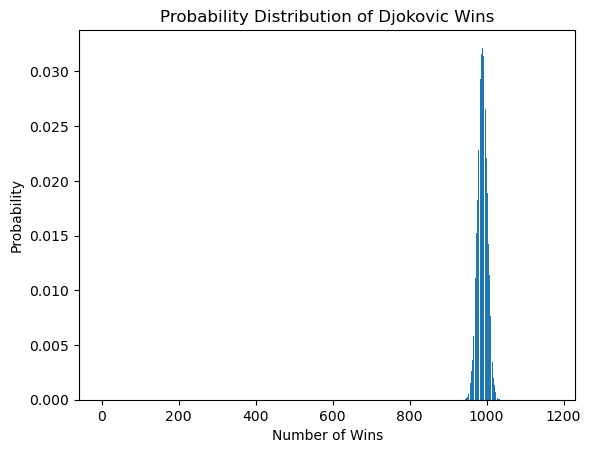

In [7]:
# Step 6: Visualize
# Visualize the probability distribution
x = range(n+1)
pmf_djokovic = rv.pmf(x)
plt.bar(x, pmf_djokovic)
plt.title('Probability Distribution of Djokovic Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Probability')
plt.show()


In [8]:
import pandas as pd

df = pd.read_csv("atp_tennis_.csv")
df = df[(df['Player_1'] == 'Djokovic N.') | (df['Player_2'] == 'Djokovic N.')]

df['First_Set_Score'] = df['Score'].str.split().str[0]

In [9]:
# Extract first set scores and determine Djokovic's wins in the first set
def win_first_set(row):
    # Function to determine if Djokovic won the first set in a match
    player_1, player_2, first_set_score = row['Player_1'], row['Player_2'], row['First_Set_Score']
    if pd.isnull(first_set_score):
        return None  
    player_1_score, player_2_score = map(int, first_set_score.split('-'))
    if player_1 == 'Djokovic N.' and player_1_score > player_2_score:
        return True
    elif player_2 == 'Djokovic N.' and player_2_score > player_1_score:
        return True
    elif 'Djokovic N.' in [player_1, player_2]:
        return False
    else:
        return None 
    
# Apply the function to create a new column
df['Djokovic_First_Set_Win'] = df.apply(win_first_set, axis=1)


df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,First_Set_Score,Djokovic_First_Set_Win
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,368,65,-1,-1,5.50,1.12,6-7 1-6,6-7,False
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,67,272,-1,-1,1.53,2.35,6-2 4-6 4-6,6-2,False
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,54,272,-1,-1,1.28,3.50,4-6 6-4 6-4,4-6,True
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,81,248,-1,-1,1.61,2.20,4-6 7-5 6-4,4-6,True
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,188,4,-1,-1,7.50,1.07,0-6 2-6 1-6,0-6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,31,1,1380,11045,11.00,1.05,3-6 2-6,3-6,True
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,23,1,1570,11045,7.00,1.10,6-4 6-7 4-6,6-4,False
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,7,1,4280,11045,3.75,1.29,5-7 7-6 4-6,5-7,True
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,1,5,11045,4935,1.36,3.20,5-7 7-6 7-5,5-7,False


In [10]:
# Calculate wins and losses in the first set
first_set_wins = df['Djokovic_First_Set_Win'] == True

wins = first_set_wins.sum()



In [11]:
n = len(df)
p = wins / n
rv = binom(n, p)

print(n, p, rv)

1171 0.7617421007685738 <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13755ae90>


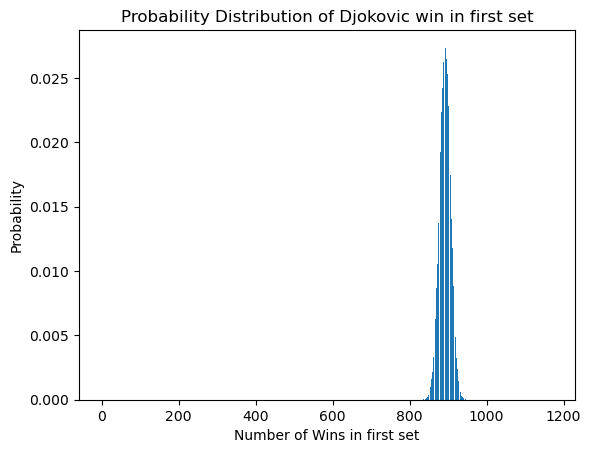

In [12]:
# Visualize the probability distribution for first set wins
x = range(n+1)
pmf_djokovic = rv.pmf(x)
plt.bar(x, pmf_djokovic)
plt.title('Probability Distribution of Djokovic win in first set')
plt.xlabel('Number of Wins in first set')
plt.ylabel('Probability')
plt.show()

In [13]:
#Second Set Win Djokovic
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Djokovic
df = df[(df['Player_1'] == 'Djokovic N.') | (df['Player_2'] == 'Djokovic N.')]


# Extract second set scores and determine Djokovic's wins in the second set
def win_second_set(row):
    try:
        second_set_score = row['Score'].split()[1]  # Extract second set score
        player_1, player_2 = row['Player_1'], row['Player_2']

        if pd.isnull(second_set_score):
            return None

        player_1_score, player_2_score = map(int, second_set_score.split('-'))

        if player_1 == 'Djokovic N.' and player_1_score > player_2_score:
            return True
        elif player_2 == 'Djokovic N.' and player_2_score > player_1_score:
            return True
        elif 'Djokovic N.' in [player_1, player_2]:
            return False
        else:
            return None
    except IndexError:
        return None

# Apply the function to create a new column for Djokovic's second set wins
df['Djokovic_Second_Set_Win'] = df.apply(win_second_set, axis=1)

df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Djokovic_Second_Set_Win
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,368,65,-1,-1,5.50,1.12,6-7 1-6,False
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,67,272,-1,-1,1.53,2.35,6-2 4-6 4-6,True
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,54,272,-1,-1,1.28,3.50,4-6 6-4 6-4,False
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,81,248,-1,-1,1.61,2.20,4-6 7-5 6-4,False
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,188,4,-1,-1,7.50,1.07,0-6 2-6 1-6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,31,1,1380,11045,11.00,1.05,3-6 2-6,True
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,23,1,1570,11045,7.00,1.10,6-4 6-7 4-6,True
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,7,1,4280,11045,3.75,1.29,5-7 7-6 4-6,False
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,1,5,11045,4935,1.36,3.20,5-7 7-6 7-5,True


                 Player_1     Player_2           Score  \
13141         Djokovic N.  Volandri F.     6-7 1-6       
13527          Clement A.  Djokovic N.  6-2 4-6 4-6      
13544           Ferrer D.  Djokovic N.  4-6 6-4 6-4      
13586  van Scheppingen D.  Djokovic N.  4-6 7-5 6-4      
14209         Djokovic N.     Safin M.  0-6 2-6 1-6      
...                   ...          ...             ...   
61475       Etcheverry T.  Djokovic N.     3-6 2-6       
61485       Griekspoor T.  Djokovic N.  6-4 6-7 4-6      
61489             Rune H.  Djokovic N.  5-7 7-6 4-6      
61492         Djokovic N.    Rublev A.  5-7 7-6 7-5      
61493         Dimitrov G.  Djokovic N.     4-6 3-6       

       Djokovic_Second_Set_Win  
13141                    False  
13527                     True  
13544                    False  
13586                    False  
14209                    False  
...                        ...  
61475                     True  
61485                     True  
61489 

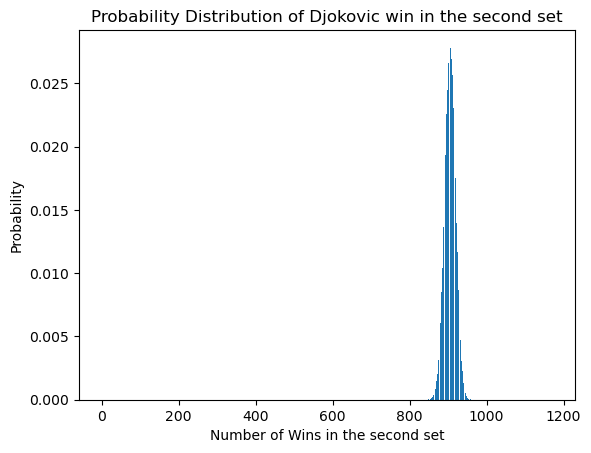

In [14]:

# Print the DataFrame to inspect the changes
print(df[['Player_1', 'Player_2', 'Score', 'Djokovic_Second_Set_Win']])

# Calculate wins and losses in the second set
second_set_wins = df['Djokovic_Second_Set_Win'] == True
wins = second_set_wins.sum()


# Print some information for debugging
print("Number of Wins in the Second Set:", wins)


n = len(df)
p = wins / n
rv = binom(n, p)

# Print parameters for the distribution for debugging
print("Number of Matches:", n)
print("Probability of Winning the Second Set:", p)

# Visualize the probability distribution for second set wins
x = range(n+1)
pmf_djokovic = rv.pmf(x)
plt.bar(x, pmf_djokovic)
plt.title('Probability Distribution of Djokovic win in the second set')
plt.xlabel('Number of Wins in the second set')
plt.ylabel('Probability')
plt.show()




In [15]:
#Third Set Win Djokovic
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Djokovic
df = df[(df['Player_1'] == 'Djokovic N.') | (df['Player_2'] == 'Djokovic N.')]


# Extract third set scores and determine Djokovic's wins in the third set
def win_third_set(row):
    try:
        scores = row['Score'].split()

        # Check if there is a third set score
        if len(scores) < 3:
            return None

        third_set_score = scores[2]  # Extract third set score
        player_1, player_2 = row['Player_1'], row['Player_2']

        if pd.isnull(third_set_score):
            return None

        player_1_score, player_2_score = map(int, third_set_score.split('-'))

        if player_1 == 'Djokovic N.' and player_1_score > player_2_score:
            return True
        elif player_2 == 'Djokovic N.' and player_2_score > player_1_score:
            return True
        elif 'Djokovic N.' in [player_1, player_2]:
            return False
        else:
            return None
    except IndexError:
        return None


# Apply the function to create a new column for Djokovic's third set wins
df['Djokovic_Third_Set_Win'] = df.apply(win_third_set, axis=1)

df


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Djokovic_Third_Set_Win
13141,Croatia Open,2004-07-20,International,Outdoor,Clay,1st Round,3,Djokovic N.,Volandri F.,Volandri F.,368,65,-1,-1,5.50,1.12,6-7 1-6,None
13527,Open Romania,2004-09-14,International,Outdoor,Clay,1st Round,3,Clement A.,Djokovic N.,Djokovic N.,67,272,-1,-1,1.53,2.35,6-2 4-6 4-6,True
13544,Open Romania,2004-09-16,International,Outdoor,Clay,2nd Round,3,Ferrer D.,Djokovic N.,Ferrer D.,54,272,-1,-1,1.28,3.50,4-6 6-4 6-4,False
13586,Thailand Open,2004-09-28,International,Indoor,Hard,1st Round,3,van Scheppingen D.,Djokovic N.,van Scheppingen D.,81,248,-1,-1,1.61,2.20,4-6 7-5 6-4,False
14209,Australian Open,2005-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Djokovic N.,Safin M.,Safin M.,188,4,-1,-1,7.50,1.07,0-6 2-6 1-6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61475,BNP Paribas Masters,2023-11-01,Masters 1000,Indoor,Hard,2nd Round,3,Etcheverry T.,Djokovic N.,Djokovic N.,31,1,1380,11045,11.00,1.05,3-6 2-6,None
61485,BNP Paribas Masters,2023-11-02,Masters 1000,Indoor,Hard,3rd Round,3,Griekspoor T.,Djokovic N.,Djokovic N.,23,1,1570,11045,7.00,1.10,6-4 6-7 4-6,True
61489,BNP Paribas Masters,2023-11-03,Masters 1000,Indoor,Hard,Quarterfinals,3,Rune H.,Djokovic N.,Djokovic N.,7,1,4280,11045,3.75,1.29,5-7 7-6 4-6,True
61492,BNP Paribas Masters,2023-11-04,Masters 1000,Indoor,Hard,Semifinals,3,Djokovic N.,Rublev A.,Djokovic N.,1,5,11045,4935,1.36,3.20,5-7 7-6 7-5,True


                 Player_1     Player_2           Score Djokovic_Third_Set_Win
13141         Djokovic N.  Volandri F.     6-7 1-6                       None
13527          Clement A.  Djokovic N.  6-2 4-6 4-6                      True
13544           Ferrer D.  Djokovic N.  4-6 6-4 6-4                     False
13586  van Scheppingen D.  Djokovic N.  4-6 7-5 6-4                     False
14209         Djokovic N.     Safin M.  0-6 2-6 1-6                     False
...                   ...          ...             ...                    ...
61475       Etcheverry T.  Djokovic N.     3-6 2-6                       None
61485       Griekspoor T.  Djokovic N.  6-4 6-7 4-6                      True
61489             Rune H.  Djokovic N.  5-7 7-6 4-6                      True
61492         Djokovic N.    Rublev A.  5-7 7-6 7-5                      True
61493         Dimitrov G.  Djokovic N.     4-6 3-6                       None

[1171 rows x 4 columns]
Number of Wins in the Third Set: 486
Nu

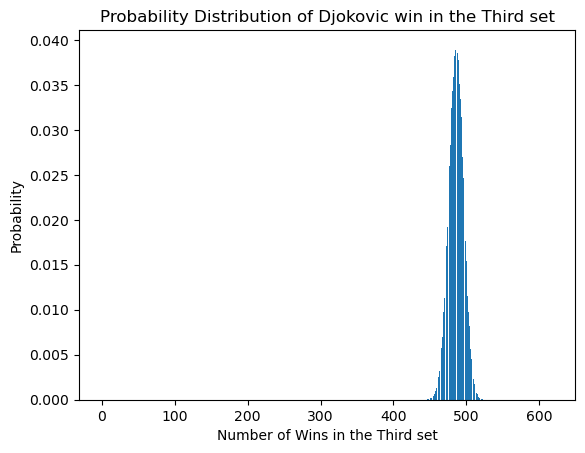

In [17]:
# Print the DataFrame to inspect the changes
print(df[['Player_1', 'Player_2', 'Score', 'Djokovic_Third_Set_Win']])

# Filter out matches without a third set
filtered_df = df.dropna(subset=['Score', 'Djokovic_Third_Set_Win'])

# Calculate wins and losses in the third set
third_set_wins = filtered_df['Djokovic_Third_Set_Win'] == True
wins = third_set_wins.sum()


# Print some information for debugging
print("Number of Wins in the Third Set:", wins)

n = len(filtered_df)
p = wins / n
rv = binom(n, p)

# Print parameters for the distribution for debugging
print("Number of Matches (with a third set):", n)
print("Probability of Winning the Third Set:", p)

# Visualize the probability distribution for third set wins
x = range(n+1)
pmf_djokovic = rv.pmf(x)
plt.bar(x, pmf_djokovic)
plt.title('Probability Distribution of Djokovic win in the Third set')
plt.xlabel('Number of Wins in the Third set')
plt.ylabel('Probability')
plt.show()


In [18]:
#First Set Win Alcaraz Carlos
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Alcaraz
df = df[(df['Player_1'] == 'Alcaraz C.') | (df['Player_2'] == 'Alcaraz C.')]


# Extract first set scores and determine Alcaraz's wins in the first set
def win_first_set(row):
    try:
        first_set_score = row['Score'].split()[1]  # Extract first set score
        player_1, player_2 = row['Player_1'], row['Player_2']

        if pd.isnull(first_set_score):
            return None

        player_1_score, player_2_score = map(int, first_set_score.split('-'))

        if player_1 == 'Alcaraz C.' and player_1_score > player_2_score:
            return True
        elif player_2 == 'Alcaraz C.' and player_2_score > player_1_score:
            return True
        elif 'Alcaraz C.' in [player_1, player_2]:
            return False
        else:
            return None
    except IndexError:
        return None

# Apply the function to create a new column for Alcaraz's first set win
df['Alcaraz_First_Set_Win'] = df.apply(win_first_set, axis=1)

df


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Alcaraz_First_Set_Win
53200,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Alcaraz C.,Ramos-Vinolas A.,Alcaraz C.,406,41,82,1130,4.33,1.20,7-6 4-6 7-6,False
53213,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Alcaraz C.,Coria F.,Coria F.,406,116,82,466,1.83,1.83,4-6 6-4 4-6,True
54099,Great Ocean Road Open,2021-02-03,ATP250,Outdoor,Hard,2nd Round,3,Goffin D.,Alcaraz C.,Alcaraz C.,14,146,2600,464,1.33,3.25,3-6 3-6,True
54102,Great Ocean Road Open,2021-02-04,ATP250,Outdoor,Hard,3rd Round,3,Monteiro T.,Alcaraz C.,Monteiro T.,83,146,824,464,3.20,1.36,7-6 6-3,False
54204,Australian Open,2021-02-09,Grand Slam,Outdoor,Hard,1st Round,5,Alcaraz C.,Van De Zandschulp B.,Alcaraz C.,141,151,484,461,1.66,2.20,6-1 6-4 6-4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61176,China Open,2023-10-03,ATP500,Outdoor,Hard,Semifinals,3,Sinner J.,Alcaraz C.,Sinner J.,7,2,4465,8535,4.00,1.25,7-6 6-1,False
61254,Shanghai Masters,2023-10-07,Masters 1000,Outdoor,Hard,2nd Round,3,Alcaraz C.,Barrere G.,Alcaraz C.,2,73,8715,753,1.04,13.00,6-2 7-5,True
61278,Shanghai Masters,2023-10-09,Masters 1000,Outdoor,Hard,3rd Round,3,Alcaraz C.,Evans D.,Alcaraz C.,2,33,8715,1301,1.08,8.00,7-6 6-4,True
61287,Shanghai Masters,2023-10-11,Masters 1000,Outdoor,Hard,4th Round,3,Alcaraz C.,Dimitrov G.,Dimitrov G.,2,19,8715,1880,1.17,5.00,7-5 2-6 4-6,False


           Player_1              Player_2           Score  \
53200    Alcaraz C.      Ramos-Vinolas A.  7-6 4-6 7-6      
53213    Alcaraz C.              Coria F.  4-6 6-4 4-6      
54099     Goffin D.            Alcaraz C.     3-6 3-6       
54102   Monteiro T.            Alcaraz C.     7-6 6-3       
54204    Alcaraz C.  Van De Zandschulp B.  6-1 6-4 6-4      
...             ...                   ...             ...   
61176     Sinner J.            Alcaraz C.     7-6 6-1       
61254    Alcaraz C.            Barrere G.     6-2 7-5       
61278    Alcaraz C.              Evans D.     7-6 6-4       
61287    Alcaraz C.           Dimitrov G.  7-5 2-6 4-6      
61468  Safiullin R.            Alcaraz C.     6-3 6-4       

       Alcaraz_First_Set_Win  
53200                  False  
53213                   True  
54099                   True  
54102                  False  
54204                   True  
...                      ...  
61176                  False  
61254              

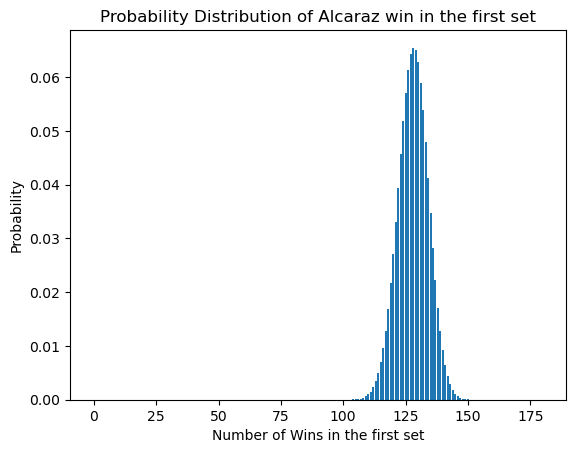

In [19]:
# Print the DataFrame to inspect the changes
print(df[['Player_1', 'Player_2', 'Score', 'Alcaraz_First_Set_Win']])

# Calculate wins and losses in the first set
first_set_win = df['Alcaraz_First_Set_Win'] == True
wins = first_set_win.sum()

# Print some information for debugging
print("Number of Wins in the First Set:", wins)

n = len(df)
p = wins / n
rv = binom(n, p)

# Print parameters for the distribution for debugging
print("Number of Matches:", n)
print("Probability of Winning the First Set:", p)

# Visualize the probability distribution for first set wins
x = range(n+1)
pmf_sinner = rv.pmf(x)
plt.bar(x, pmf_sinner)
plt.title('Probability Distribution of Alcaraz win in the first set')
plt.xlabel('Number of Wins in the first set')
plt.ylabel('Probability')
plt.show()



In [20]:
#Second Set Win Alcaraz Carlos
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Sinner
df = df[(df['Player_1'] == 'Alcaraz C.') | (df['Player_2'] == 'Alcaraz C.')]


# Extract second set scores and determine Alcaraz's wins in the second set
def win_second_set(row):
    try:
        second_set_score = row['Score'].split()[1]  # Extract second set score
        player_1, player_2 = row['Player_1'], row['Player_2']

        if pd.isnull(second_set_score):
            return None

        player_1_score, player_2_score = map(int, second_set_score.split('-'))

        if player_1 == 'Alcaraz C.' and player_1_score > player_2_score:
            return True
        elif player_2 == 'Alcaraz C.' and player_2_score > player_1_score:
            return True
        elif 'Alcaraz C.' in [player_1, player_2]:
            return False
        else:
            return None
    except IndexError:
        return None

# Apply the function to create a new column for Alcaraz's second set win
df['Alcaraz_Second_Set_Win'] = df.apply(win_second_set, axis=1)

df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Alcaraz_Second_Set_Win
53200,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Alcaraz C.,Ramos-Vinolas A.,Alcaraz C.,406,41,82,1130,4.33,1.20,7-6 4-6 7-6,False
53213,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Alcaraz C.,Coria F.,Coria F.,406,116,82,466,1.83,1.83,4-6 6-4 4-6,True
54099,Great Ocean Road Open,2021-02-03,ATP250,Outdoor,Hard,2nd Round,3,Goffin D.,Alcaraz C.,Alcaraz C.,14,146,2600,464,1.33,3.25,3-6 3-6,True
54102,Great Ocean Road Open,2021-02-04,ATP250,Outdoor,Hard,3rd Round,3,Monteiro T.,Alcaraz C.,Monteiro T.,83,146,824,464,3.20,1.36,7-6 6-3,False
54204,Australian Open,2021-02-09,Grand Slam,Outdoor,Hard,1st Round,5,Alcaraz C.,Van De Zandschulp B.,Alcaraz C.,141,151,484,461,1.66,2.20,6-1 6-4 6-4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61176,China Open,2023-10-03,ATP500,Outdoor,Hard,Semifinals,3,Sinner J.,Alcaraz C.,Sinner J.,7,2,4465,8535,4.00,1.25,7-6 6-1,False
61254,Shanghai Masters,2023-10-07,Masters 1000,Outdoor,Hard,2nd Round,3,Alcaraz C.,Barrere G.,Alcaraz C.,2,73,8715,753,1.04,13.00,6-2 7-5,True
61278,Shanghai Masters,2023-10-09,Masters 1000,Outdoor,Hard,3rd Round,3,Alcaraz C.,Evans D.,Alcaraz C.,2,33,8715,1301,1.08,8.00,7-6 6-4,True
61287,Shanghai Masters,2023-10-11,Masters 1000,Outdoor,Hard,4th Round,3,Alcaraz C.,Dimitrov G.,Dimitrov G.,2,19,8715,1880,1.17,5.00,7-5 2-6 4-6,False


           Player_1              Player_2           Score  \
53200    Alcaraz C.      Ramos-Vinolas A.  7-6 4-6 7-6      
53213    Alcaraz C.              Coria F.  4-6 6-4 4-6      
54099     Goffin D.            Alcaraz C.     3-6 3-6       
54102   Monteiro T.            Alcaraz C.     7-6 6-3       
54204    Alcaraz C.  Van De Zandschulp B.  6-1 6-4 6-4      
...             ...                   ...             ...   
61176     Sinner J.            Alcaraz C.     7-6 6-1       
61254    Alcaraz C.            Barrere G.     6-2 7-5       
61278    Alcaraz C.              Evans D.     7-6 6-4       
61287    Alcaraz C.           Dimitrov G.  7-5 2-6 4-6      
61468  Safiullin R.            Alcaraz C.     6-3 6-4       

       Alcaraz_Second_Set_Win  
53200                   False  
53213                    True  
54099                    True  
54102                   False  
54204                    True  
...                       ...  
61176                   False  
61254      

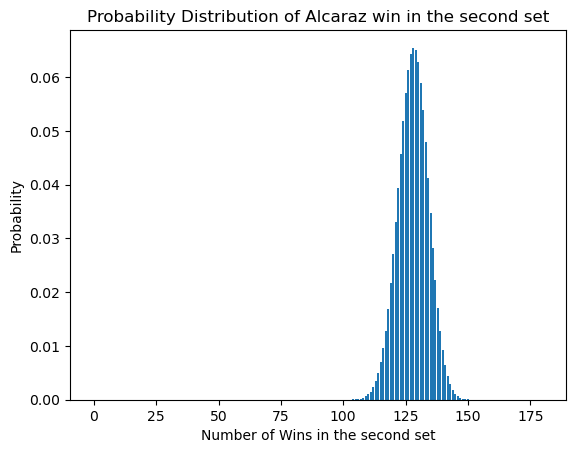

In [21]:

# Print the DataFrame to inspect the changes
print(df[['Player_1', 'Player_2', 'Score', 'Alcaraz_Second_Set_Win']])

# Calculate wins and losses in the second set
second_set_win = df['Alcaraz_Second_Set_Win'] == True
wins = second_set_win.sum()


# Print some information for debugging
print("Number of Wins in the Second Set:", wins)


n = len(df)
p = wins / n
rv = binom(n, p)

# Print parameters for the distribution for debugging
print("Number of Matches:", n)
print("Probability of Winning the Second Set:", p)

# Visualize the probability distribution for second set wins
x = range(n+1)
pmf_sinner = rv.pmf(x)
plt.bar(x, pmf_sinner)
plt.title('Probability Distribution of Alcaraz win in the second set')
plt.xlabel('Number of Wins in the second set')
plt.ylabel('Probability')
plt.show()

In [22]:
#Third Set Alcaraz Carlos
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Djokovic
df = df[(df['Player_1'] == 'Alcaraz C.') | (df['Player_2'] == 'Alcaraz C.')]


# Extract third set scores and determine Alcaraz's wins in the third set
def win_third_set(row):
    try:
        scores = row['Score'].split()

        # Check if there is a third set score
        if len(scores) < 3:
            return None

        third_set_score = scores[2]  # Extract third set score
        player_1, player_2 = row['Player_1'], row['Player_2']

        if pd.isnull(third_set_score):
            return None

        player_1_score, player_2_score = map(int, third_set_score.split('-'))

        if player_1 == 'Alcaraz C.' and player_1_score > player_2_score:
            return True
        elif player_2 == 'Alcaraz C.' and player_2_score > player_1_score:
            return True
        elif 'Alcaraz C.' in [player_1, player_2]:
            return False
        else:
            return None
    except IndexError:
        return None


# Apply the function to create a new column for Alcaraz's third set wins
df['Alcaraz_Third_Set_Win'] = df.apply(win_third_set, axis=1)

df



,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Alcaraz_Third_Set_Win
53200,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Alcaraz C.,Ramos-Vinolas A.,Alcaraz C.,406,41,82,1130,4.33,1.20,7-6 4-6 7-6,True
53213,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Alcaraz C.,Coria F.,Coria F.,406,116,82,466,1.83,1.83,4-6 6-4 4-6,False
54099,Great Ocean Road Open,2021-02-03,ATP250,Outdoor,Hard,2nd Round,3,Goffin D.,Alcaraz C.,Alcaraz C.,14,146,2600,464,1.33,3.25,3-6 3-6,None
54102,Great Ocean Road Open,2021-02-04,ATP250,Outdoor,Hard,3rd Round,3,Monteiro T.,Alcaraz C.,Monteiro T.,83,146,824,464,3.20,1.36,7-6 6-3,None
54204,Australian Open,2021-02-09,Grand Slam,Outdoor,Hard,1st Round,5,Alcaraz C.,Van De Zandschulp B.,Alcaraz C.,141,151,484,461,1.66,2.20,6-1 6-4 6-4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61176,China Open,2023-10-03,ATP500,Outdoor,Hard,Semifinals,3,Sinner J.,Alcaraz C.,Sinner J.,7,2,4465,8535,4.00,1.25,7-6 6-1,None
61254,Shanghai Masters,2023-10-07,Masters 1000,Outdoor,Hard,2nd Round,3,Alcaraz C.,Barrere G.,Alcaraz C.,2,73,8715,753,1.04,13.00,6-2 7-5,None
61278,Shanghai Masters,2023-10-09,Masters 1000,Outdoor,Hard,3rd Round,3,Alcaraz C.,Evans D.,Alcaraz C.,2,33,8715,1301,1.08,8.00,7-6 6-4,None
61287,Shanghai Masters,2023-10-11,Masters 1000,Outdoor,Hard,4th Round,3,Alcaraz C.,Dimitrov G.,Dimitrov G.,2,19,8715,1880,1.17,5.00,7-5 2-6 4-6,False


           Player_1              Player_2           Score  \
53200    Alcaraz C.      Ramos-Vinolas A.  7-6 4-6 7-6      
53213    Alcaraz C.              Coria F.  4-6 6-4 4-6      
54099     Goffin D.            Alcaraz C.     3-6 3-6       
54102   Monteiro T.            Alcaraz C.     7-6 6-3       
54204    Alcaraz C.  Van De Zandschulp B.  6-1 6-4 6-4      
...             ...                   ...             ...   
61176     Sinner J.            Alcaraz C.     7-6 6-1       
61254    Alcaraz C.            Barrere G.     6-2 7-5       
61278    Alcaraz C.              Evans D.     7-6 6-4       
61287    Alcaraz C.           Dimitrov G.  7-5 2-6 4-6      
61468  Safiullin R.            Alcaraz C.     6-3 6-4       

      Alcaraz_Third_Set_Win  
53200                  True  
53213                 False  
54099                  None  
54102                  None  
54204                  True  
...                     ...  
61176                  None  
61254                  None

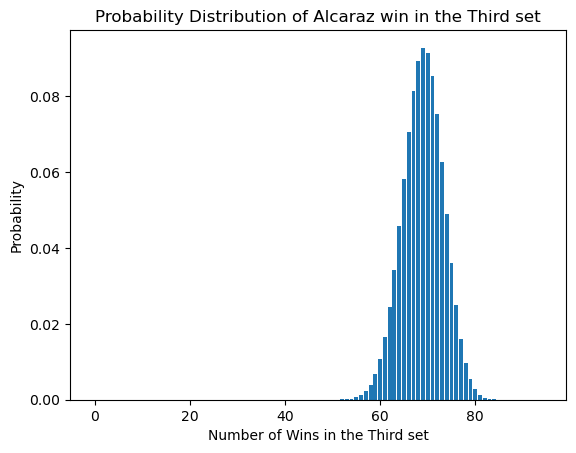

In [23]:
# Print the DataFrame to inspect the changes
print(df[['Player_1', 'Player_2', 'Score', 'Alcaraz_Third_Set_Win']])

# Filter out matches without a third set
filtered_df = df.dropna(subset=['Score', 'Alcaraz_Third_Set_Win'])

# Calculate wins and losses in the third set
third_set_wins = filtered_df['Alcaraz_Third_Set_Win'] == True
wins = third_set_wins.sum()


# Print some information for debugging
print("Number of Wins in the Third Set:", wins)

n = len(filtered_df)
p = wins / n
rv = binom(n, p)

# Print parameters for the distribution for debugging
print("Number of Matches (with a third set):", n)
print("Probability of Winning the Third Set:", p)

# Visualize the probability distribution for third set wins
x = range(n+1)
pmf_djokovic = rv.pmf(x)
plt.bar(x, pmf_djokovic)
plt.title('Probability Distribution of Alcaraz win in the Third set')
plt.xlabel('Number of Wins in the Third set')
plt.ylabel('Probability')
plt.show()


Number of Wins of Alcaraz against Djokovic: 2
Number of Losses of Alcaraz against Djokovic: 2
Number of Matches: 4
Probability of Alcaraz Winning against Djokovic 0.5


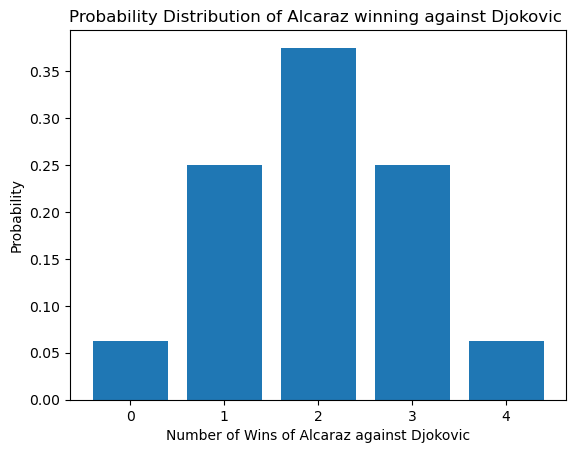

In [24]:
#Probability of Alcaraz winning against Djokovic

import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches between Djokovic, world champion and Fritz, tenth in the world
df = df[((df['Player_1'] == 'Djokovic N.') & (df['Player_2'] == 'Alcaraz C.')) | ((df['Player_1'] == 'Alcaraz C.') & (df['Player_2'] == 'Djokovic N.'))]

# Select matches involving Alcaraz
djokovic_alcaraz_matches = df[((df['Player_1'] == 'Djokovic N.') & (df['Player_2'] == 'Alcaraz C.')) | ((df['Player_1'] == 'Alcaraz C.') & (df['Player_2'] == 'Djokovic N.'))]
djokovic_alcaraz_matches

# Calculate wins and losses
alcaraz_wins = djokovic_alcaraz_matches['Winner'] == 'Alcaraz C.'

wins = alcaraz_wins.sum()
losses = len(djokovic_alcaraz_matches) - wins

# Fit Probability Distribution
# Assuming a binomial distribution for the win/loss record
# Here, 'n' would be the total number of matches between Djokovic and Fritz and 'p' the win probability of Fritz
n = len(djokovic_alcaraz_matches)
p = wins / n
rv = binom(n, p)

print("Number of Wins of Alcaraz against Djokovic:", wins)
print("Number of Losses of Alcaraz against Djokovic:", losses)


# Print parameters for the distribution
print("Number of Matches:", n)
print("Probability of Alcaraz Winning against Djokovic", p)


# Visualize the probability distribution
x = range(n+1)
pmf_djokovic_alcaraz = rv.pmf(x)
plt.bar(x, pmf_djokovic_alcaraz)
plt.title('Probability Distribution of Alcaraz winning against Djokovic ')
plt.xlabel('Number of Wins of Alcaraz against Djokovic')
plt.ylabel('Probability')
plt.show()


Number of Wins of Sinner against Alcaraz: 4
Number of Losses of Sinner against Alcaraz: 3
Number of Matches: 7
Probability of Sinner Winning against Alcaraz 0.5714285714285714


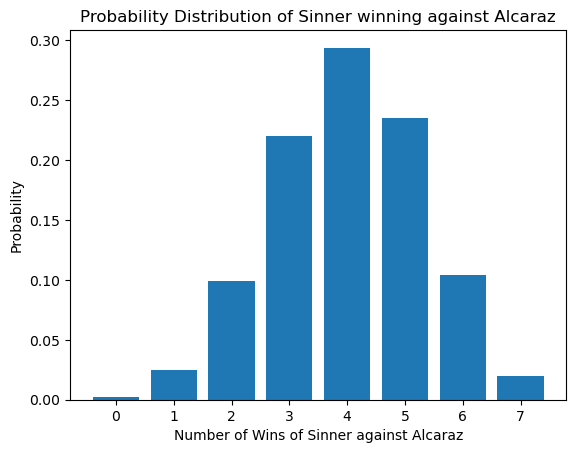

In [24]:
#Probability Distribution of Sinner winning against Alcaraz

import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches between Sinner and Alcaraz
df = df[((df['Player_1'] == 'Sinner J.') & (df['Player_2'] == 'Alcaraz C.')) | ((df['Player_1'] == 'Alcaraz C.') & (df['Player_2'] == 'Sinner J.'))]

# Select matches involving Alcaraz
sinner_alcaraz_matches =df[((df['Player_1'] == 'Sinner J.') & (df['Player_2'] == 'Alcaraz C.')) | ((df['Player_1'] == 'Alcaraz C.') & (df['Player_2'] == 'Sinner J.'))]
sinner_alcaraz_matches

# Calculate wins and losses
sinner_wins = sinner_alcaraz_matches['Winner'] == 'Sinner J.'

wins = sinner_wins.sum()
losses = len(sinner_alcaraz_matches) - wins

# Fit Probability Distribution
# Assuming a binomial distribution for the win/loss record
# Here, 'n' would be the total number of matches between Sinner and Alcaraz and 'p' the win probability of Sinner
n = len(sinner_alcaraz_matches)
p = wins / n
rv = binom(n, p)


print("Number of Wins of Sinner against Alcaraz:", wins)
print("Number of Losses of Sinner against Alcaraz:", losses)


# Print parameters for the distribution
print("Number of Matches:", n)
print("Probability of Sinner Winning against Alcaraz", p)

# Visualize the probability distribution
x = range(n+1)
pmf_sinner_alcaraz = rv.pmf(x)
plt.bar(x, pmf_sinner_alcaraz)
plt.title('Probability Distribution of Sinner winning against Alcaraz')
plt.xlabel('Number of Wins of Sinner against Alcaraz')
plt.ylabel('Probability')
plt.show()


Number of Wins of Djokovic on Hard surface: 621
Number of Losses of Djokovic on Hard Surface: 104
Number of Matches: 725
Probability of Djokovic  Winning on Hard Surface 0.856551724137931


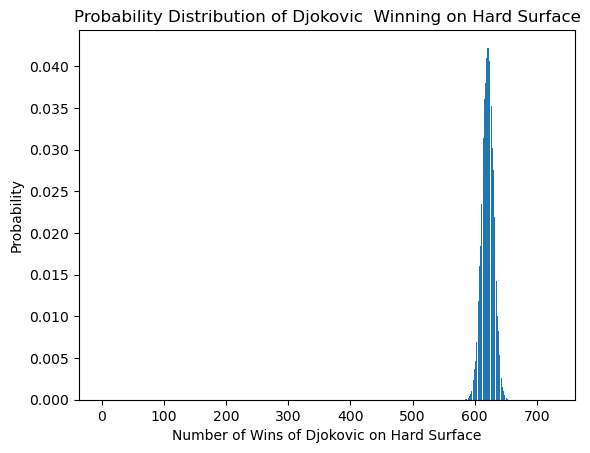

In [25]:
#Probability distribution of Djokovic Novak on different surface type: Hard vs Clay 

#Hard 

import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Djokovic on Hard surface
df = df[((df['Player_1'] =='Djokovic N.') | (df['Player_2'] =='Djokovic N.')) & (df['Surface'] == 'Hard')]

# Select matches Djokovic on Hard surface
djokovic_hard_surface_matches = df[((df['Player_1'] =='Djokovic N.') | (df['Player_2'] =='Djokovic N.')) & (df['Surface'] == 'Hard')]


# Calculate wins and losses
djokovic_hard_surface_matches_wins = djokovic_hard_surface_matches['Winner'] == 'Djokovic N.'

wins = djokovic_hard_surface_matches_wins.sum()
losses = len(djokovic_hard_surface_matches) - wins

# Fit Probability Distribution
# Assuming a binomial distribution for the win/loss record
# Here, 'n' would be the total number of matches on hard surface played by Djokovic and 'p' the win probability of Djokovic
n = len(djokovic_hard_surface_matches)
p = wins / n
rv = binom(n, p)


print("Number of Wins of Djokovic on Hard surface:", wins)
print("Number of Losses of Djokovic on Hard Surface:", losses)


# Print parameters for the distribution
print("Number of Matches:", n)
print("Probability of Djokovic  Winning on Hard Surface", p)


# Visualize the probability distribution 
x = range(n+1)
pmf_djokovic_hard_surface = rv.pmf(x)
plt.bar(x, pmf_djokovic_hard_surface)
plt.title('Probability Distribution of Djokovic  Winning on Hard Surface')
plt.xlabel('Number of Wins of Djokovic on Hard Surface')
plt.ylabel('Probability')
plt.show()


Number of Wins of Djokovic on Clay surface: 253
Number of Losses of Djokovic on Clay Surface: 57
Number of Matches: 310
Probability of Djokovic Winning on Clay Surface 0.8161290322580645


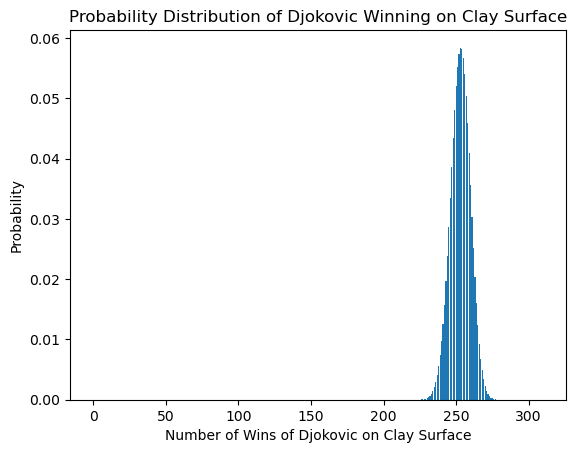

In [26]:
#Clay 

import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Djokovic on Clay surface
df = df[((df['Player_1'] =='Djokovic N.') | (df['Player_2'] =='Djokovic N.')) & (df['Surface'] == 'Clay')]

# Select matches Djokovic on Clay surface
djokovic_clay_surface_matches = df[((df['Player_1'] =='Djokovic N.') | (df['Player_2'] =='Djokovic N.')) & (df['Surface'] == 'Clay')]


# Calculate wins and losses
djokovic_clay_surface_matches_wins = djokovic_clay_surface_matches['Winner'] == 'Djokovic N.'

wins = djokovic_clay_surface_matches_wins.sum()
losses = len(djokovic_clay_surface_matches) - wins

# Fit Probability Distribution
# Assuming a binomial distribution for the win/loss record
# Here, 'n' would be the total number of matches on clay surface played by Djokovic and 'p' the win probability of Djokovic
n = len(djokovic_clay_surface_matches)
p = wins / n
rv = binom(n, p)


print("Number of Wins of Djokovic on Clay surface:", wins)
print("Number of Losses of Djokovic on Clay Surface:", losses)


# Print parameters for the distribution
print("Number of Matches:", n)
print("Probability of Djokovic Winning on Clay Surface", p)


# Visualize the probability distribution 
x = range(n+1)
pmf_djokovic_clay_surface = rv.pmf(x)
plt.bar(x, pmf_djokovic_clay_surface)
plt.title('Probability Distribution of Djokovic Winning on Clay Surface')
plt.xlabel('Number of Wins of Djokovic on Clay Surface')
plt.ylabel('Probability')
plt.show()

Number of Wins of Alcaraz on Hard surface: 66
Number of Losses of Alcaraz on Hard Surface: 23
Number of Matches: 89
Probability of Alcaraz Winning on Hard Surface 0.7415730337078652


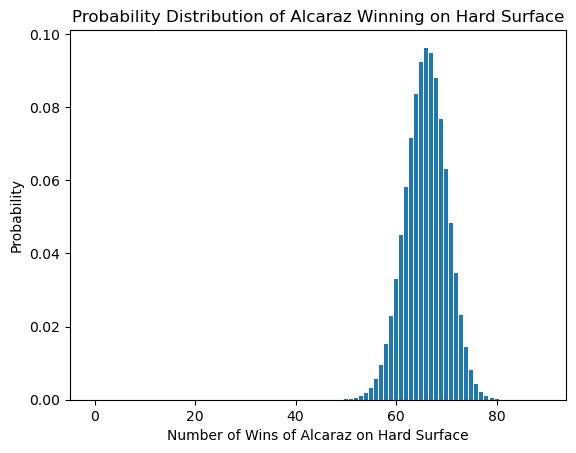

In [7]:
#Probability distribution of Alcaraz on different surface type: Hard vs Clay 

#Hard 

import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Alcaraz on Hard surface
df = df[((df['Player_1'] =='Alcaraz C.') | (df['Player_2'] == 'Alcaraz C.')) & (df['Surface'] == 'Hard')]


# Select matches Alcaraz on Hard surface
alcaraz_hard_surface_matches = df[((df['Player_1'] =='Alcaraz C.') | (df['Player_2'] == 'Alcaraz C.')) & (df['Surface'] == 'Hard')]

# Calculate wins and losses
alcaraz_hard_surface_matches_wins = alcaraz_hard_surface_matches['Winner'] == 'Alcaraz C.'

wins = alcaraz_hard_surface_matches_wins.sum()
losses = len(alcaraz_hard_surface_matches) - wins

# Fit Probability Distribution
# Assuming a binomial distribution for the win/loss record
# Here, 'n' would be the total number of matches on hard surface played by Alcaraz and 'p' the win probability of Alcaraz
n = len(alcaraz_hard_surface_matches)
p = wins / n
rv = binom(n, p)


print("Number of Wins of Alcaraz on Hard surface:", wins)
print("Number of Losses of Alcaraz on Hard Surface:", losses)

# Print parameters for the distribution
print("Number of Matches:", n)
print("Probability of Alcaraz Winning on Hard Surface", p)


# Visualize the probability distribution 
x = range(n+1)
pmf_alcaraz_hard_surface = rv.pmf(x)
plt.bar(x, pmf_alcaraz_hard_surface)
plt.title('Probability Distribution of Alcaraz Winning on Hard Surface')
plt.xlabel('Number of Wins of Alcaraz on Hard Surface')
plt.ylabel('Probability')
plt.show()


Number of Wins of Alcaraz on Clay surface: 60
Number of Losses of Alcaraz on Clay Surface: 13
Number of Matches: 73
Probability of Alcaraz Winning on Clay Surface 0.821917808219178


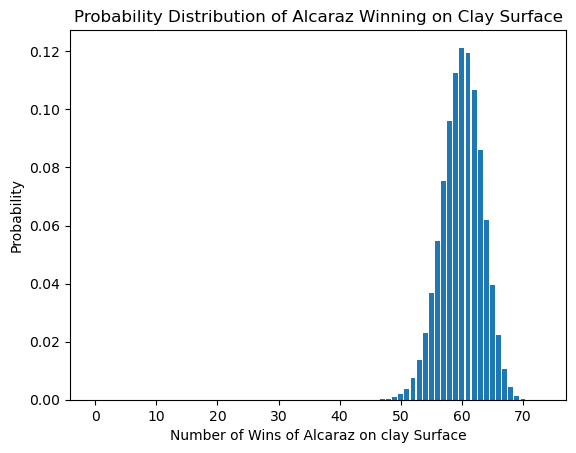

In [9]:
#Clay 

import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("atp_tennis_.csv")

# Filter matches involving Alcaraz on Clay surface
df = df[((df['Player_1'] =='Alcaraz C.') | (df['Player_2'] == 'Alcaraz C.')) & (df['Surface'] == 'Clay')]


# Select matches Alcaraz on Clay surface
alcaraz_clay_surface_matches = df[((df['Player_1'] =='Alcaraz C.') | (df['Player_2'] == 'Alcaraz C.')) & (df['Surface'] == 'Clay')]

# Calculate wins and losses
alcaraz_clay_surface_matches_wins = alcaraz_clay_surface_matches['Winner'] == 'Alcaraz C.'

wins = alcaraz_clay_surface_matches_wins.sum()
losses = len(alcaraz_clay_surface_matches) - wins

# Fit Probability Distribution
# Assuming a binomial distribution for the win/loss record
# Here, 'n' would be the total number of matches on clay surface played by Alcaraz and 'p' the win probability of Alcaraz
n = len(alcaraz_clay_surface_matches)
p = wins / n
rv = binom(n, p)


print("Number of Wins of Alcaraz on Clay surface:", wins)
print("Number of Losses of Alcaraz on Clay Surface:", losses)

# Print parameters for the distribution
print("Number of Matches:", n)
print("Probability of Alcaraz Winning on Clay Surface", p)


# Visualize the probability distribution 
x = range(n+1)
pmf_alcaraz_clay_surface = rv.pmf(x)
plt.bar(x, pmf_alcaraz_clay_surface)
plt.title('Probability Distribution of Alcaraz Winning on Clay Surface')
plt.xlabel('Number of Wins of Alcaraz on clay Surface')
plt.ylabel('Probability')
plt.show()
